# Reading Data Set using pandas

In [216]:
import pandas as pd
df=pd.read_csv("dataset.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [192]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,337.000000,342.000000,342.000000,342.000000,328
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male
freq,152,168,NaN,NaN,NaN,NaN,164
mean,NaN,NaN,43.876855,17.151170,200.915205,4273.976608,NaN
std,NaN,NaN,5.478600,1.974793,14.061714,1119.229602,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.200000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.100000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4793.750000,NaN


# Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [193]:
df.isnull().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [217]:
completely_missing_columns = df.columns[df.isnull().all()]
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


Fill missing numerical data with median values


In [195]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in numerical_columns:
    if column not in completely_missing_columns:
        df[column] = df[column].fillna(df[column].median())

Fill missing categorical data with mode (only for columns with at least some non-NaN values)

In [196]:
if 'sex' not in completely_missing_columns:
    df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

Summary of missing data

In [197]:
df.isnull().sum()



species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [218]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


Replace 'unknown' in 'sex' with None

In [201]:
df['sex'] = df['sex'].replace('unknown', None)

# Q2.What is the average body_mass_g for Gentoo penguins? (code)

In [202]:
gentoo_avg_body_mass = df[df['species'] == 'Gentoo']['body_mass_g'].mean()
gentoo_avg_body_mass

5125.0

# Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

To analyze how the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species, we can visualize the data using plots like boxplots, histograms, and KDE plots, which show the spread, central tendency, and shape of the distribution for each species. Additionally, analyzing skewness and kurtosis helps quantify the asymmetry and the "tailedness" of the distributions.

Skewness measures the degree of asymmetry of the data around the mean. A skewness of 0 indicates a perfectly symmetrical distribution, while positive skewness indicates that the right tail is longer or fatter, and negative skewness means the left tail is longer or fatter.
Kurtosis measures the "tailedness" of the data. High kurtosis means more data points are in the tails (leptokurtic), while low kurtosis indicates fewer extreme values (platykurtic).
By calculating skewness and kurtosis for bill_length_mm and bill_depth_mm for each species, we can compare how these characteristics differ across the penguin species and understand the shape of their distributions.

In [203]:
from scipy.stats import kurtosis, skew

In [215]:
distribution_analysis = {}
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    distribution_analysis[species] = {
        'bill_length_mm_skewness': skew(species_data['bill_length_mm'].dropna()),
        'bill_length_mm_kurtosis': kurtosis(species_data['bill_length_mm'].dropna()),
        'bill_depth_mm_skewness': skew(species_data['bill_depth_mm'].dropna()),
        'bill_depth_mm_kurtosis': kurtosis(species_data['bill_depth_mm'].dropna()),
        'flipper_length_mm_skewness': skew(species_data['flipper_length_mm'].dropna()),
        'flipper_length_mm_kurtosis': kurtosis(species_data['flipper_length_mm'].dropna()),
        'body_mass_g_skewness': skew(species_data['body_mass_g'].dropna()),
        'body_mass_g_kurtosis': kurtosis(species_data['body_mass_g'].dropna()),
        
    }
for species, metrics in distribution_analysis.items():
    print(f"Species: {species}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

Species: Adelie
bill_length_mm_skewness: 0.1665
bill_length_mm_kurtosis: -0.2245
bill_depth_mm_skewness: 0.3296
bill_depth_mm_kurtosis: -0.0960
flipper_length_mm_skewness: 0.0727
flipper_length_mm_kurtosis: 0.2597
body_mass_g_skewness: 8.7371
body_mass_g_kurtosis: 93.4027
Species: Gentoo
bill_length_mm_skewness: 0.7209
bill_length_mm_kurtosis: 1.1770
bill_depth_mm_skewness: 0.3464
bill_depth_mm_kurtosis: -0.5844
flipper_length_mm_skewness: 0.2001
flipper_length_mm_kurtosis: -0.2333
body_mass_g_skewness: 5.0144
body_mass_g_kurtosis: 41.0192
Species: Chinstrap
bill_length_mm_skewness: -0.0932
bill_length_mm_kurtosis: -0.1191
bill_depth_mm_skewness: 0.0067
bill_depth_mm_kurtosis: -0.8987
flipper_length_mm_skewness: -0.0093
flipper_length_mm_kurtosis: -0.0439
body_mass_g_skewness: 5.7226
body_mass_g_kurtosis: 39.3843


# Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

To detect outliers, the Interquartile Range (IQR) method is used. It calculates the range between the 25th percentile (Q1) and the 75th percentile (Q3) of a feature. Outliers are defined as data points that lie outside the range of Q1−1.5×IQR (lower bound) and Q3+1.5×IQR (upper bound). These outliers are then visualized using boxplots, which display the distribution and highlight values outside the expected range.

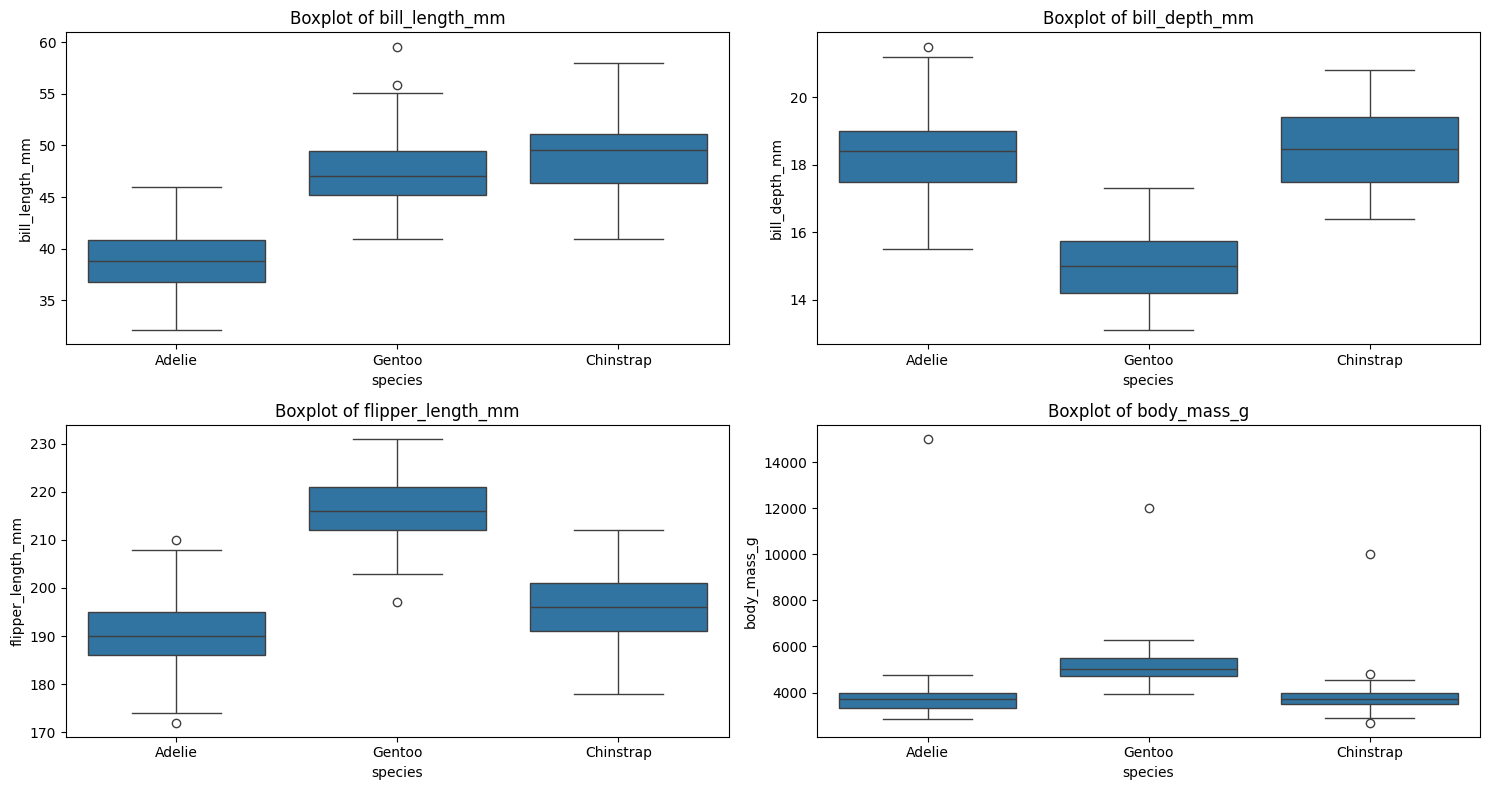

Outliers detected: {'bill_length_mm': 0, 'bill_depth_mm': 0, 'flipper_length_mm': 0, 'body_mass_g': 3}


In [205]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
outlier_info = {}

for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_info[column] = len(outliers)


plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

print("Outliers detected:", outlier_info)


To visualize outliers using a different plot, we can use the Z-Score method to detect outliers and then plot them using a scatter plot with highlighted outliers. The Z-Score indicates how far a data point is from the mean in terms of standard deviations. Outliers typically have Z-Scores greater than 3 or less than -3.

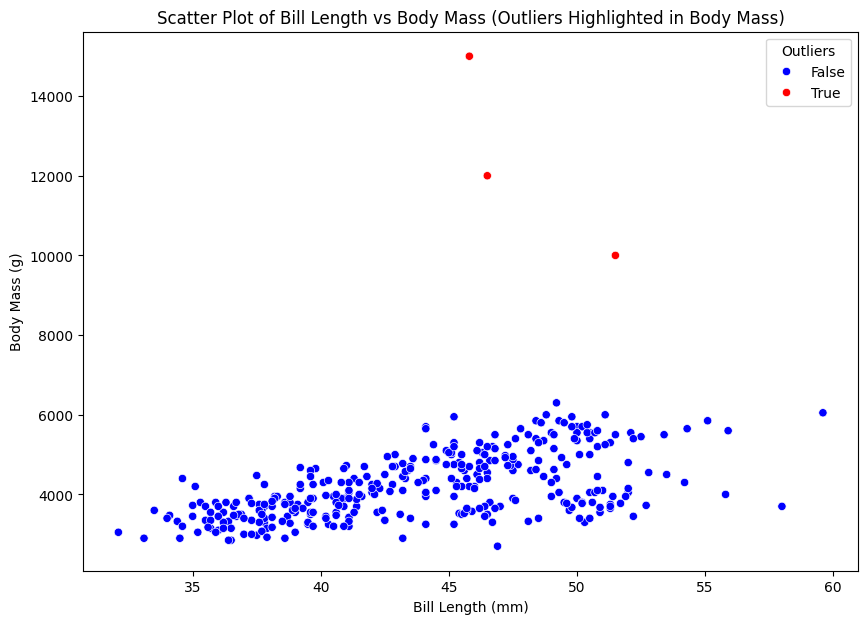

In [206]:
# Calculate the Z-Score for 'body_mass_g'
z_scores_body_mass = np.abs(zscore(df['body_mass_g']))

# Identify outliers (Z-Score > 3)
outliers_body_mass = z_scores_body_mass > 3

# Create a DataFrame for visualization with outliers
outliers_df_body_mass = df.copy()
outliers_df_body_mass['outlier'] = outliers_body_mass

# Visualize using a scatter plot and highlight outliers in body_mass_g
plt.figure(figsize=(10, 7))
sns.scatterplot(data=outliers_df_body_mass, x='bill_length_mm', y='body_mass_g', hue='outlier', palette={True: 'red', False: 'blue'})
plt.title("Scatter Plot of Bill Length vs Body Mass (Outliers Highlighted in Body Mass)")
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend(title="Outliers", loc="upper right")
plt.show()

# Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

Yes, the dataset contributes to the curse of dimensionality because it has multiple features and relatively fewer samples. High-dimensional data can cause overfitting and make it harder to detect patterns. To mitigate this, Principal Component Analysis (PCA) is applied, which reduces the number of dimensions while retaining the most important variance in the data. PCA transforms the data into new orthogonal components. This allows for better visualization and model performance by simplifying the dataset. The explained variance ratio shows how much of the original variance is captured in the reduced dimensions.

To perform PCA, we first standardize the data so that all features have a mean of 0 and a standard deviation of 1. Then, we calculate the covariance matrix to understand the relationships between the features. Next, we compute the eigenvalues and eigenvectors of this matrix, which tell us the directions of maximum variance in the data and how much variance each direction captures. We select the top eigenvectors based on the largest eigenvalues and use them to transform the data into a lower-dimensional space. This reduces the number of features while retaining the most important information, making the data easier to analyze

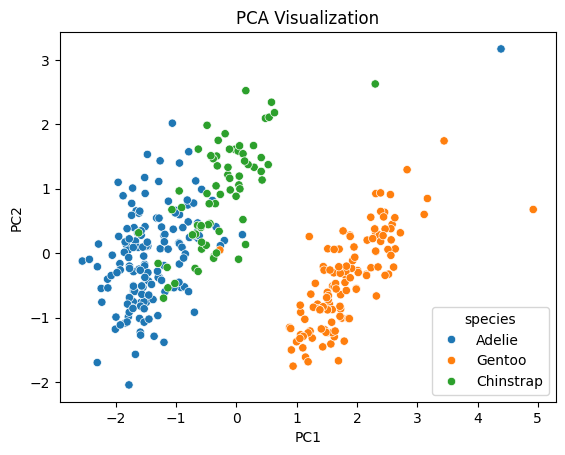

Explained variance ratio: [0.61711071 0.19733481]


In [207]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaled_data = StandardScaler().fit_transform(df[features].dropna())


pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['species'] = df['species'].reset_index(drop=True)

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species')
plt.title("PCA Visualization")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)



Dataset after pca

In [219]:
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']
pca_df.head()

,PC1,PC2,species
0,-1.824854,0.132488,Adelie
1,-1.279180,-0.374008,Adelie
2,-1.201436,-0.191262,Adelie
3,-0.274490,0.048591,Adelie
4,-1.795367,0.046838,Adelie


# Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

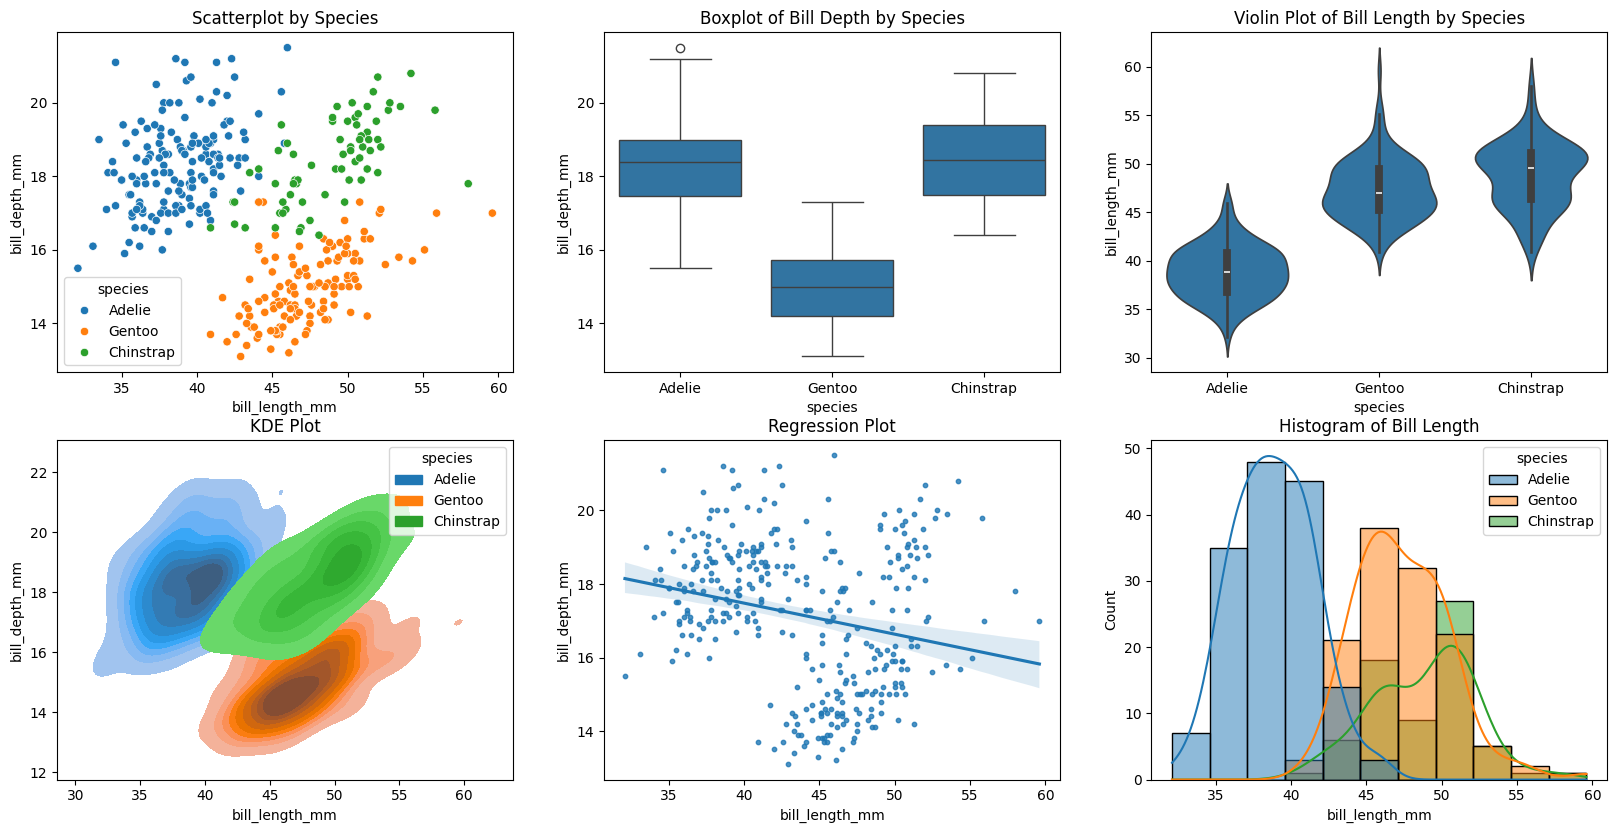

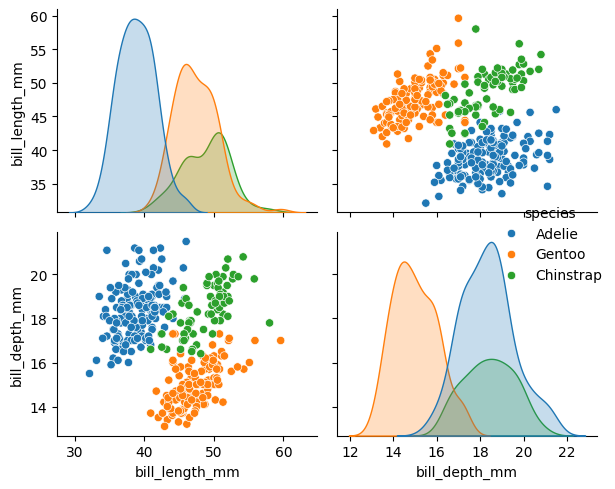

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

# Scatterplot
plt.subplot(3, 3, 1)
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title("Scatterplot by Species")

# Boxplot
plt.subplot(3, 3, 2)
sns.boxplot(data=df, x='species', y='bill_depth_mm')
plt.title("Boxplot of Bill Depth by Species")

# Violin Plot
plt.subplot(3, 3, 3)
sns.violinplot(data=df, x='species', y='bill_length_mm')
plt.title("Violin Plot of Bill Length by Species")

# KDE Plot
plt.subplot(3, 3, 4)
sns.kdeplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', fill=True)
plt.title("KDE Plot")

# Regression Plot
plt.subplot(3, 3, 5)
sns.regplot(data=df, x='bill_length_mm', y='bill_depth_mm', scatter_kws={'s': 10})
plt.title("Regression Plot")

# Histogram
plt.subplot(3, 3, 6)
sns.histplot(data=df, x='bill_length_mm', hue='species', kde=True)
plt.title("Histogram of Bill Length")

# Pairplot (Separate Figure)
sns.pairplot(df, vars=['bill_length_mm', 'bill_depth_mm'], hue='species')

plt.tight_layout()
plt.show()


# Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [210]:
result = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
longest_flippers = result.loc[result.groupby('island')['flipper_length_mm'].idxmax()]
print(longest_flippers)

     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


# Q8: Perform z-score normalization on this dataset. (code)

In [211]:
from scipy.stats import zscore

# Apply Z-Score normalization
normalized_df = df.copy()
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
normalized_df[numerical_columns] = normalized_df[numerical_columns].apply(zscore)

# Verify normalization
print(normalized_df[numerical_columns].describe())


       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
count      344.000000   3.440000e+02       3.440000e+02  3.440000e+02
mean         0.000000   2.478637e-16       2.065531e-16  3.098297e-16
std          1.001457   1.001457e+00       1.001457e+00  1.001457e+00
min         -2.175852  -2.060850e+00      -2.063241e+00 -1.411143e+00
25%         -0.850734  -7.893593e-01      -7.778411e-01 -6.484475e-01
50%          0.040373   7.525452e-02      -2.779635e-01 -1.998032e-01
75%          0.834520   7.872894e-01       8.646139e-01  4.563391e-01
max          2.902997   2.211359e+00       2.150013e+00  9.625507e+00


In [220]:
normalized_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.883054,0.787289,-1.420541,-0.468990,male
1,Adelie,Torgersen,-0.809180,0.126114,-1.063485,-0.424125,female
2,Adelie,Torgersen,-0.661432,0.431272,-0.420786,-0.917634,female
3,Adelie,Torgersen,0.040373,0.075255,-0.277964,-0.199803,male
4,Adelie,Torgersen,-1.326299,1.092447,-0.563608,-0.738176,female
